In [0]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
from pylab import show, hist, subplot, figure

In [22]:
dt=pd.read_csv('microchipDataset.csv', delimiter = ',')
dt

,x1,x2,label
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


In [0]:
X=[]
Y=[]
for i in range(len(dt)):
  temp=[]
  temp1=[]
  temp.append(dt.iloc[i,0])
  temp.append(dt.iloc[i,1])
  X.append(temp)
  # temp1.append(dt.iloc[i,2])
  Y.append(dt.iloc[i,2])

In [0]:
sample1=np.random.rand(1000)
sample2=np.random.rand(1000)

z1=np.sqrt(-2 * np.log(sample1)) * np.cos(2 * np.pi * sample2)
z2=np.sqrt(-2 * np.log(sample1)) * np.cos(2 * np.pi * sample2)+2

Text(0.5, 1.0, 'Distribution of data for classes 1 and 0')

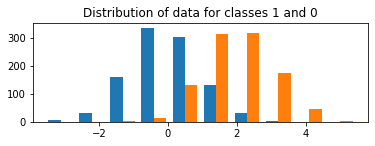

In [25]:
newX1=[]
newX2=[]
for i in range(len(Y)):
  if Y[i]==1:
    newX1.append(random.choice(z2))
    newX2.append(random.choice(z2))
  else:
    newX1.append(random.choice(z1))
    newX2.append(random.choice(z1))

distribution = np.c_[z1, z2]
subplot(211)
hist(distribution)
plt.title('Distribution of data for classes 1 and 0')

In [0]:
trainX=[]
trainY=[]
testX=[]
testY=[]
for i in range(len(Y)):
  if(i<0.70*len(Y)):
    trainX.append([newX1[i],newX2[i]])
    trainY.append([Y[i]])
  else:
    testX.append([newX1[i],newX2[i]])
    testY.append([Y[i]])

In [0]:
trainX = np.asarray(trainX)
trainY = np.asarray(trainY)
testX = np.asarray(testX)
testY = np.asarray(testY)

In [0]:
cnt=0
mu0=np.zeros((1,trainX.shape[1]))
for i in range(len(trainX)):
  if(trainY[i]==0):
    mu0[0,:]+=trainX[i]
    cnt+=1
mu0=mu0/(cnt)

cnt=0
mu1=np.zeros((1,trainX.shape[1]))
for i in range(len(trainX)):
  if(trainY[i]==1):
    mu1[0,:]+=trainX[i]
    cnt+=1
mu1=mu1/(cnt)

sigma=np.zeros((trainX.shape[0],trainX.shape[0]))
temp=np.ndarray(shape=trainX.shape)
for i in range(len(trainY)):
  if(trainY[i]==1):
    temp[i]=np.subtract(trainX[i],mu1)
  else:
    temp[i]=np.subtract(trainX[i],mu0)
sigma=np.dot(temp.T,temp)/len(trainY)


In [29]:
mu0

array([[0.11416843, 0.06326132]])

In [30]:
mu1

array([[1.93294301, 2.07559012]])

In [31]:
print(trainX.shape,trainY.shape)

(83, 2) (83, 1)


In [32]:
testX

array([[ 1.67221255,  1.59574813],
       [ 0.83291359,  0.95517002],
       [-0.27288482,  1.49697344],
       [ 1.60935365,  0.05102294],
       [-1.52325718, -1.33245622],
       [-0.80399395,  0.62463891],
       [ 1.35082498, -1.68123966],
       [ 1.82410949, -0.49769173],
       [ 0.7970407 ,  0.0963043 ],
       [-0.12485366, -0.07265827],
       [ 1.12526457, -0.29356594],
       [ 0.09559496, -1.65752631],
       [ 0.83291359,  0.44095117],
       [ 0.20929645, -0.3214381 ],
       [ 0.78668453, -0.45575742],
       [-0.31316456,  0.40296212],
       [ 0.48112568, -0.69820887],
       [ 0.12410202,  0.26396826],
       [-1.26877045,  1.28033962],
       [ 0.55424936, -0.46913598],
       [-0.83248234, -0.86106811],
       [-0.51125681, -0.18649386],
       [-1.39015824, -0.86106811],
       [ 0.38854551,  0.37872922],
       [-0.8603907 ,  0.58214729],
       [ 1.02348327, -0.96558835],
       [ 0.97009406,  0.79498109],
       [-0.31439899, -0.72788271],
       [ 0.305175  ,

In [33]:
trainY

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [0]:
phi=0
for i in trainY:
    if(i==1):
      phi+=1
phi/=len(trainY)

In [35]:
phi

0.6987951807228916

In [0]:
def value(xVal,mu0,mu1,phi,sigma):
  term1=(2*3.14)**(len(mu0)/2)*np.sqrt(np.linalg.det(sigma))
  
  term2=np.exp(-0.5* np.dot( (xVal-mu0), np.dot(np.linalg.inv(sigma), (xVal-mu0).T)))
  probXY0=1/term1*term2

  probY0=1-phi

  probFor0=probXY0*probY0

  term1=(2*3.14)**(len(mu1)/2)*np.sqrt(np.linalg.det(sigma))
  term2=np.exp(-0.5* np.dot( (xVal-mu1), np.dot(np.linalg.inv(sigma), (xVal-mu1).T)))
  probXY1=1/term1*term2

  probY1=phi

  probFor1=probXY1*probY1

  if(probFor0>probFor1):
    return 0
  else:
    return 1


In [0]:
def accuracy(testX,testY,mu0,mu1,phi,sigma):
  it=0
  cnt=0
  for i in range(len(testY)):
    ans= value(testX[i],mu0,mu1,phi,sigma)
    if ans==testY[it][0]:
      cnt+=1
    it+=1
  
  return cnt/len(testY)*100

In [38]:
print(accuracy(testX,testY,mu0,mu1,phi,sigma))

91.42857142857143
